In [1]:
#preliminaries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import tree

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
from sklearn.cross_validation import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.base import clone
from itertools import combinations 
import numpy as mp

from sklearn.cross_validation import cross_val_score, KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.cross_validation import StratifiedKFold
from sklearn.learning_curve import validation_curve
from sklearn.learning_curve import learning_curve

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from scipy import interp

from tpot import TPOTClassifier
from sklearn.linear_model import LogisticRegression


/Users/ivan/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/ivan/anaconda/lib/python3.6/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


## 1. Importing data

In [2]:
col = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header=None, index_col=False, names=col)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## 2. Exploring data

In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


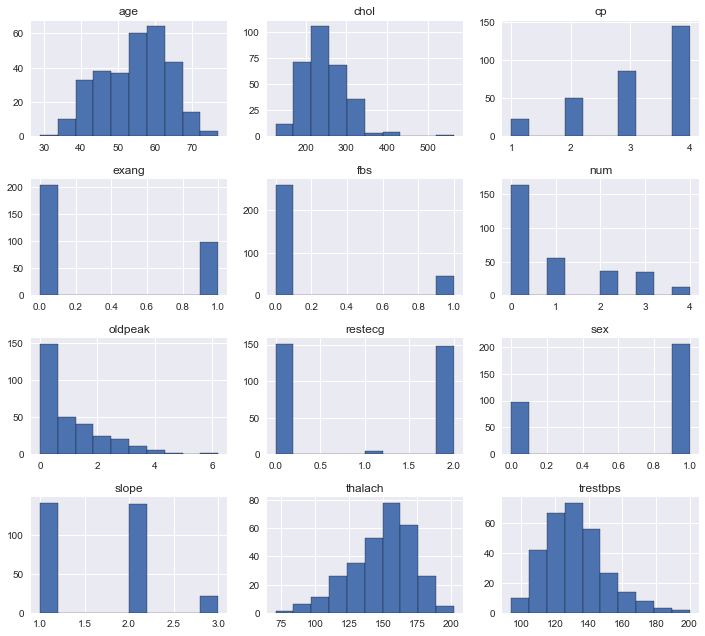

In [4]:
df.hist(figsize=(10,9), ec="k")

plt.tight_layout()
plt.show()

**Dealing with missing variables description**

- Notice that some variables were missing from our description. To deal with this the below attempt is made to appropriately categorise missing data in a way that could be numerically analysed

In [5]:
df = df.replace("?",np.NaN)

In [6]:
df = df.apply(pd.to_numeric)

**Identifying missing variables** 
- Notice that both 'ca' and 'thal' were misisng instances with a count value of 299 and 301 respectively. Less than the 303 count for the other features 

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


**Skewness** 

A significant number of variables (as viewed via the histograms below) are skewed. This may be extenuated by the boundaries associated with our categorical varibales. 

- ca, cholestrol, exang, fps, slope, trestbps and oldpeak have a left skew
- age, cp, sex, and thalach have a right skew

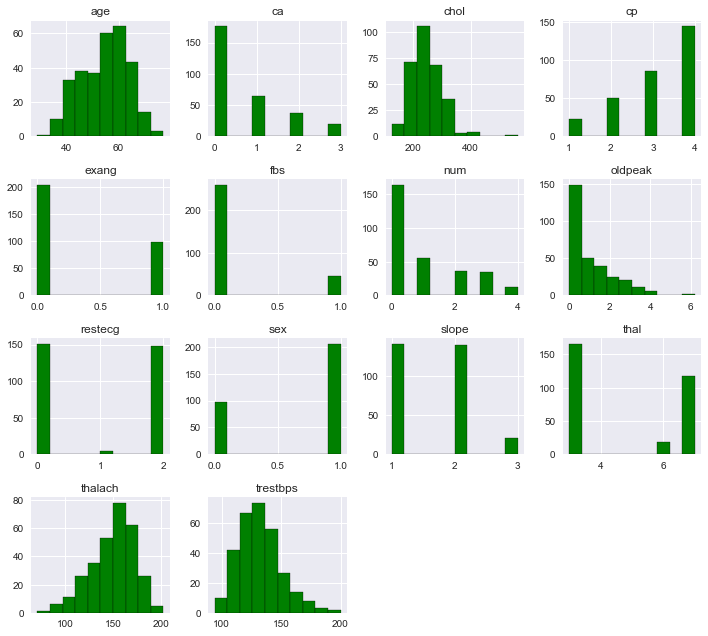

In [8]:
df.hist(figsize=(10,9), ec="k", color='g')

plt.tight_layout()
plt.show()

**Understanding correlation** 
- Used to investigate the dependence between multiple variables within our dataset. The below matrix suggests:
- Highest positive correlating variable to 'num'  = thal, ca, oldpeak and exang
- Lowest positive correlating variable to 'num' = fbs, chol
- Negative correlating varibale to 'num' = thalach

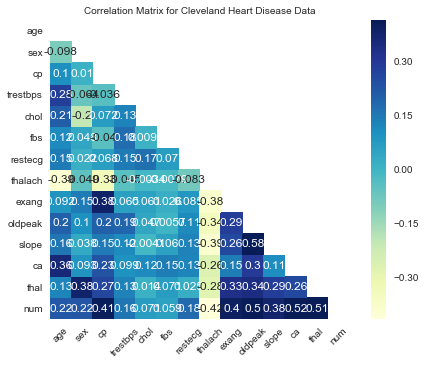

In [9]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, annot = True, mask=mask, vmax=.3, square=True, cmap="YlGnBu")

plt.setp(ax.axes.get_xticklabels(), rotation=45, fontsize='10')
plt.rcParams['figure.figsize']=(20,10)
plt.title('Correlation Matrix for Cleveland Heart Disease Data', fontsize='10')

## 3. Data pre-processing

### Handling missing data
- for both 'ca' and 'thal', median imputation was used to fill the value of the missing instances 
- both variables are categorical and therefore median imputation was used over mean impuation - none integar results would not be useful or rather poorly categorised

In [10]:
df.isnull().sum() 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [11]:
df['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [12]:
df['ca'].fillna(df['ca'].median(), inplace=True)
df['ca'].value_counts()

0.0    180
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [13]:
df['thal'].value_counts()

3.0    166
7.0    117
6.0     18
Name: thal, dtype: int64

In [14]:
df['thal'].fillna(df['thal'].median(), inplace=True)
df['thal'].value_counts()

3.0    168
7.0    117
6.0     18
Name: thal, dtype: int64

### Handling categorical data
- categories for each variable are not consistent in terms of type of labelling. 
- as part of handling categorical data each varibale is reclassed according to their value type eg from 'float' to 'int'. Each categorical variable is also recoded from starting from zero. 
- finally the 'num' varibale is recorded into 0=healthy and 1=diseased

In [15]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [16]:
df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']] = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']].astype(int)

In [17]:
df.dtypes

age         float64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
num           int64
dtype: object

In [18]:
cp_mapping = {label:idx for idx,label in enumerate(np.unique(df['cp']))}
cp_mapping

{1: 0, 2: 1, 3: 2, 4: 3}

In [19]:
thal_mapping = {label:idx for idx,label in enumerate(np.unique(df['thal']))}
thal_mapping

{3: 0, 6: 1, 7: 2}

In [20]:
slope_mapping = {label:idx for idx,label in enumerate(np.unique(df['slope']))}
slope_mapping

{1: 0, 2: 1, 3: 2}

In [21]:
df['cp'].value_counts()

4    144
3     86
2     50
1     23
Name: cp, dtype: int64

In [22]:
df['cp'] = df['cp'].map(cp_mapping)
df['cp'].value_counts()

3    144
2     86
1     50
0     23
Name: cp, dtype: int64

In [23]:
df['thal'].value_counts()

3    168
7    117
6     18
Name: thal, dtype: int64

In [24]:
df['thal'] = df['thal'].map(thal_mapping)
df['thal'].value_counts()

0    168
2    117
1     18
Name: thal, dtype: int64

In [25]:
df['slope'].value_counts()

1    142
2    140
3     21
Name: slope, dtype: int64

In [26]:
df['slope'] = df['slope'].map(slope_mapping)
df['slope'].value_counts()

0    142
1    140
2     21
Name: slope, dtype: int64

In [27]:
df['num'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [28]:
df['num'] = df['num'].apply(lambda x: 1 if x != 0 else 0)
df['num'].value_counts()

0    164
1    139
Name: num, dtype: int64

**3D Feature space**
- presents the 3D feature space for the three highest correlating features - thal, ca and oldpeak

/Users/ivan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


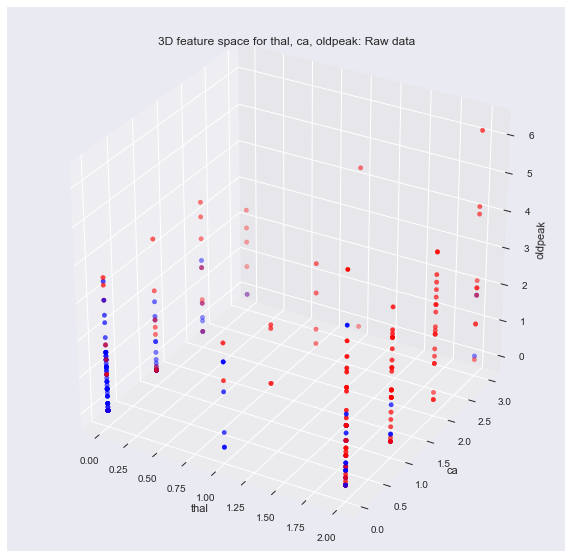

In [29]:
f1 = df['thal'].values
f2 = df['ca'].values 
f3 = df['oldpeak'].values

df1 = df.copy()

num = df1['num']
num[num == 0] = 'b' #healthy
num[num == 1] = 'r' #diseased

num=num.astype('str')
n = num.values


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d', label=['healthy','diseased'])
colors = ['red','blue']
ax.scatter(f1, f2, f3, c=n)

ax.set_xlabel('thal')
ax.set_ylabel('ca')
ax.set_zlabel('oldpeak')

plt.title('3D feature space for thal, ca, oldpeak: Raw data')
plt.show()

### Feature pre-processing
- the following investigations are to help identify the best way with which to process our 13 variables 
- Normalisation refers to the scaling features to a range of [0, 1] 
- Standardisation packages the data so that the mean = 0 and standard deviation = 1
- 11 of our variables as described above do not follow a standard normal distribution and are skewed slightly or significantly to one side. 
- Taking this into account normalisation seems a more valuable means of processing our features for supervised learning.

In [30]:
std_scale = preprocessing.StandardScaler().fit(df[['thal', 'oldpeak']])
df_std = std_scale.transform(df[['thal', 'oldpeak']])

minmax_scale = preprocessing.MinMaxScaler().fit(df[['thal', 'oldpeak']])
df_minmax = minmax_scale.transform(df[['thal', 'oldpeak']])

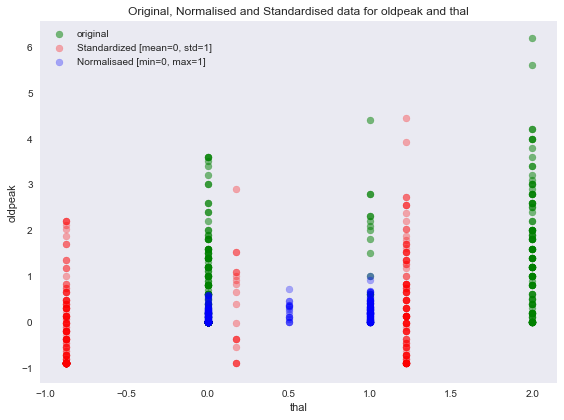

In [31]:
def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['thal'], df['oldpeak'],
            color='green', label='original', alpha=0.5)

    plt.scatter(df_std[:,0], df_std[:,1], color='red',
            label='Standardized [mean=0, std=1]', alpha=0.3)

    plt.scatter(df_minmax[:,0], df_minmax[:,1],
            color='blue', label='Normalisaed [min=0, max=1]', alpha=0.3)

    plt.title('Original, Normalised and Standardised data for oldpeak and thal')
    plt.xlabel('thal')
    plt.ylabel('oldpeak')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

In [32]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1,0,145.0,233.0,1,2,150.0,0,2.3,2,0,1,0
1,67.0,1,3,160.0,286.0,0,2,108.0,1,1.5,1,3,0,1
2,67.0,1,3,120.0,229.0,0,2,129.0,1,2.6,1,2,2,1
3,37.0,1,2,130.0,250.0,0,0,187.0,0,3.5,2,0,0,0
4,41.0,0,1,130.0,204.0,0,2,172.0,0,1.4,0,0,0,0


In [33]:
X = df.drop('num',axis=1, inplace=False)
y = df['num']

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.3, random_state=345)
    
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
272,46.0,1,3,140.0,311.0,0,0,120.0,1,1.8,1,2,2
89,51.0,0,2,130.0,256.0,0,2,149.0,0,0.5,0,0,0
129,62.0,0,3,124.0,209.0,0,0,163.0,0,0.0,0,0,0
77,51.0,0,2,140.0,308.0,0,2,142.0,0,1.5,0,1,0
152,67.0,0,2,115.0,564.0,0,2,160.0,0,1.6,1,0,2


**Normalisation scaling:**

In [34]:
mms = MinMaxScaler()

X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

X_train_norm
X_test_norm

array([[ 0.64583333,  1.        ,  1.        , ...,  0.5       ,
         0.66666667,  1.        ],
       [ 0.60416667,  1.        ,  0.33333333, ...,  0.5       ,
         0.        ,  1.        ],
       [ 0.52083333,  1.        ,  1.        , ...,  0.5       ,
         0.33333333,  0.        ],
       ..., 
       [ 0.52083333,  1.        ,  0.33333333, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.60416667,  1.        ,  0.66666667, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.39583333,  1.        ,  0.33333333, ...,  0.5       ,
         0.        ,  0.        ]])

**Standardization scaling:**

In [35]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

X_train_std
X_test_std

array([[ 0.6296581 ,  0.72469294,  0.85484528, ...,  0.64213878,
         1.38401615,  1.25705848],
       [ 0.41260523,  0.72469294, -1.41049471, ...,  0.64213878,
        -0.68956282,  1.25705848],
       [-0.02150052,  0.72469294,  0.85484528, ...,  0.64213878,
         0.34722667, -0.84963241],
       ..., 
       [-0.02150052,  0.72469294, -1.41049471, ..., -0.97849719,
        -0.68956282,  1.25705848],
       [ 0.41260523,  0.72469294, -0.27782472, ..., -0.97849719,
        -0.68956282, -0.84963241],
       [-0.67265915,  0.72469294, -1.41049471, ...,  0.64213878,
        -0.68956282, -0.84963241]])

### Feature selection
- as part of feature selection the intention is to identify features which add the greatest value to our model and remove those with least, if any value

In [36]:
# source: https://notebooks.azure.com/holgerkunz/libraries/UCLMHLBFOUR/html/MLHB_week4_data_preprocessing_with_solution.ipynb

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.30
                 
                 , random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=self.test_size, 
                                 random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

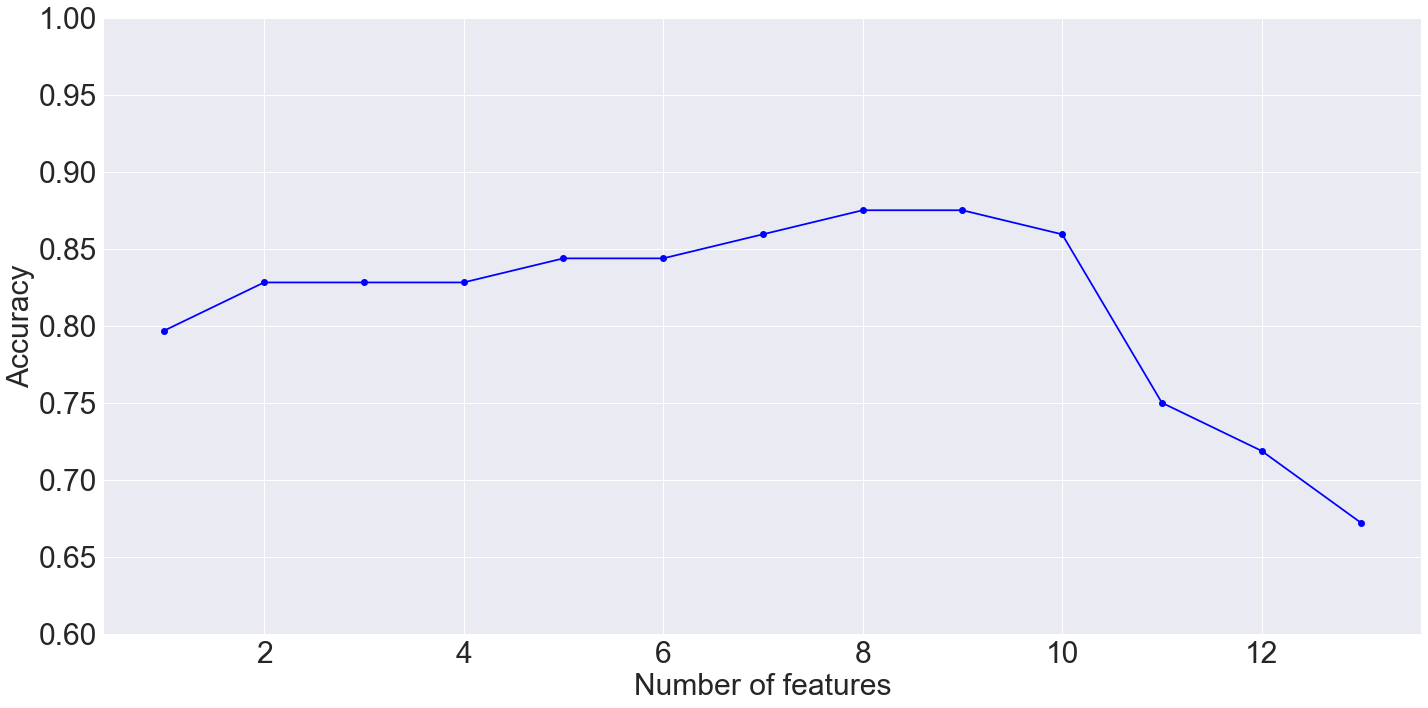

In [37]:
# source: https://notebooks.azure.com/holgerkunz/libraries/UCLMHLBFOUR/html/MLHB_week4_data_preprocessing_with_solution.ipynb

knn = KNeighborsClassifier(n_neighbors=3)

# selecting features (from X training set)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train.values, y_train)


# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, color='b', marker='o')
plt.ylim([0.6, 1.0])
plt.ylabel('Accuracy', fontsize=30)
plt.xlabel('Number of features', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.tight_layout()
plt.show()

- At 8 features the accuracy for our neighbors classifier without processing our variables is at the highest value

In [38]:
sbs.subsets_

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 5, 6, 8, 9, 10, 11, 12),
 (0, 1, 2, 5, 6, 8, 9, 11, 12),
 (0, 1, 5, 6, 8, 9, 11, 12),
 (0, 1, 6, 8, 9, 11, 12),
 (1, 6, 8, 9, 11, 12),
 (1, 6, 8, 11, 12),
 (1, 6, 11, 12),
 (1, 11, 12),
 (1, 11),
 (11,)]

In [39]:
k8=list(sbs.subsets_[5])
print(k8)

feature_labels = df.columns
print(feature_labels[k8])

[0, 1, 5, 6, 8, 9, 11, 12]
Index(['age', 'sex', 'fbs', 'restecg', 'exang', 'oldpeak', 'ca', 'thal'], dtype='object')


**With a standardised features set**

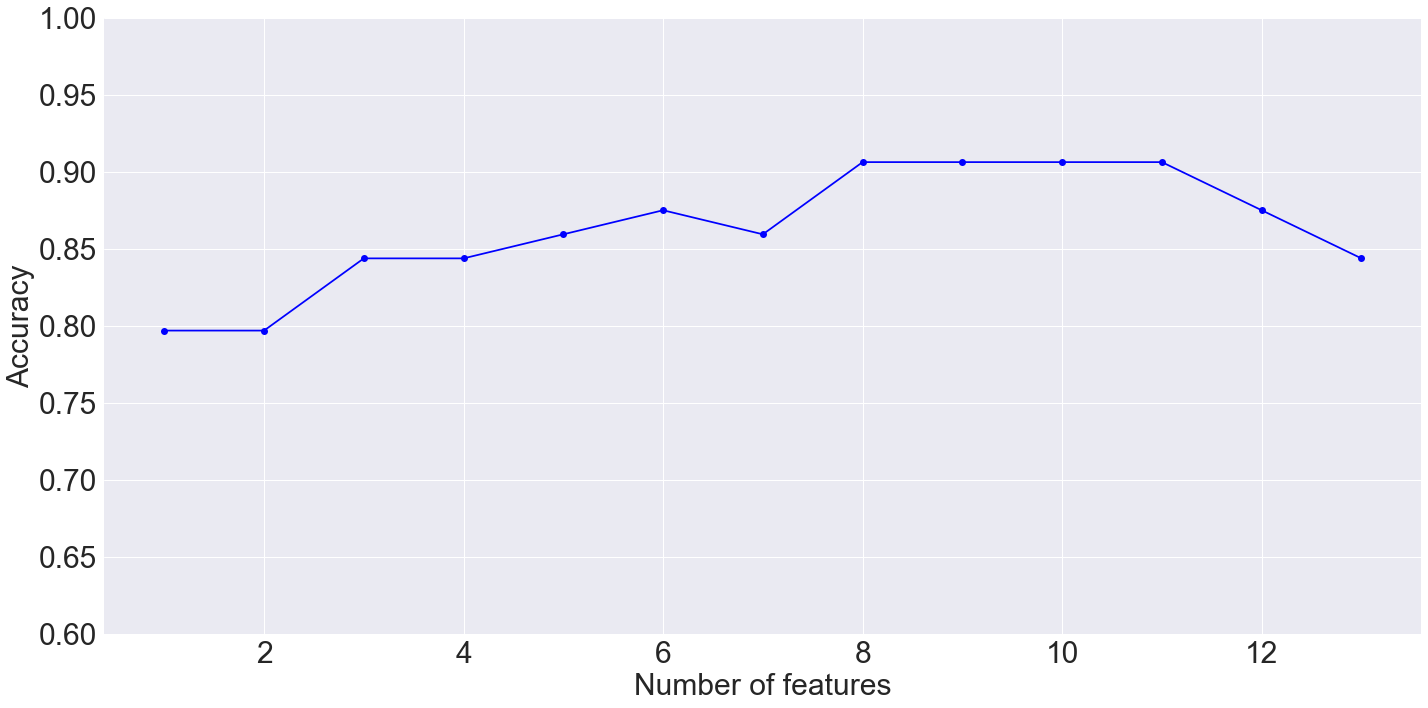

In [40]:
# source: https://notebooks.azure.com/holgerkunz/libraries/UCLMHLBFOUR/html/MLHB_week4_data_preprocessing_with_solution.ipynb

# X standardised 

knn = KNeighborsClassifier(n_neighbors=3)

# selecting features (from X training set)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)


# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, color='b', marker='o')
plt.ylim([0.6, 1.0])
plt.ylabel('Accuracy', fontsize=30)
plt.xlabel('Number of features', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.show()

- Having standardised our features the accuracy for our nearest neighbors classifier is higher than our previous model (without processing) at 8 features.

In [41]:
sbs.subsets_

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12),
 (0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 12),
 (0, 1, 2, 3, 4, 7, 8, 10, 11, 12),
 (0, 1, 2, 3, 4, 8, 10, 11, 12),
 (1, 2, 3, 4, 8, 10, 11, 12),
 (1, 2, 3, 8, 10, 11, 12),
 (1, 2, 3, 8, 10, 11),
 (1, 2, 8, 10, 11),
 (1, 8, 10, 11),
 (8, 10, 11),
 (8, 11),
 (11,)]

In [42]:
k8_std=list(sbs.subsets_[5])
print(k8_std)

feature_labels = df.columns
print(feature_labels[k8_std])

[1, 2, 3, 4, 8, 10, 11, 12]
Index(['sex', 'cp', 'trestbps', 'chol', 'exang', 'slope', 'ca', 'thal'], dtype='object')


**With a normalised feature set**

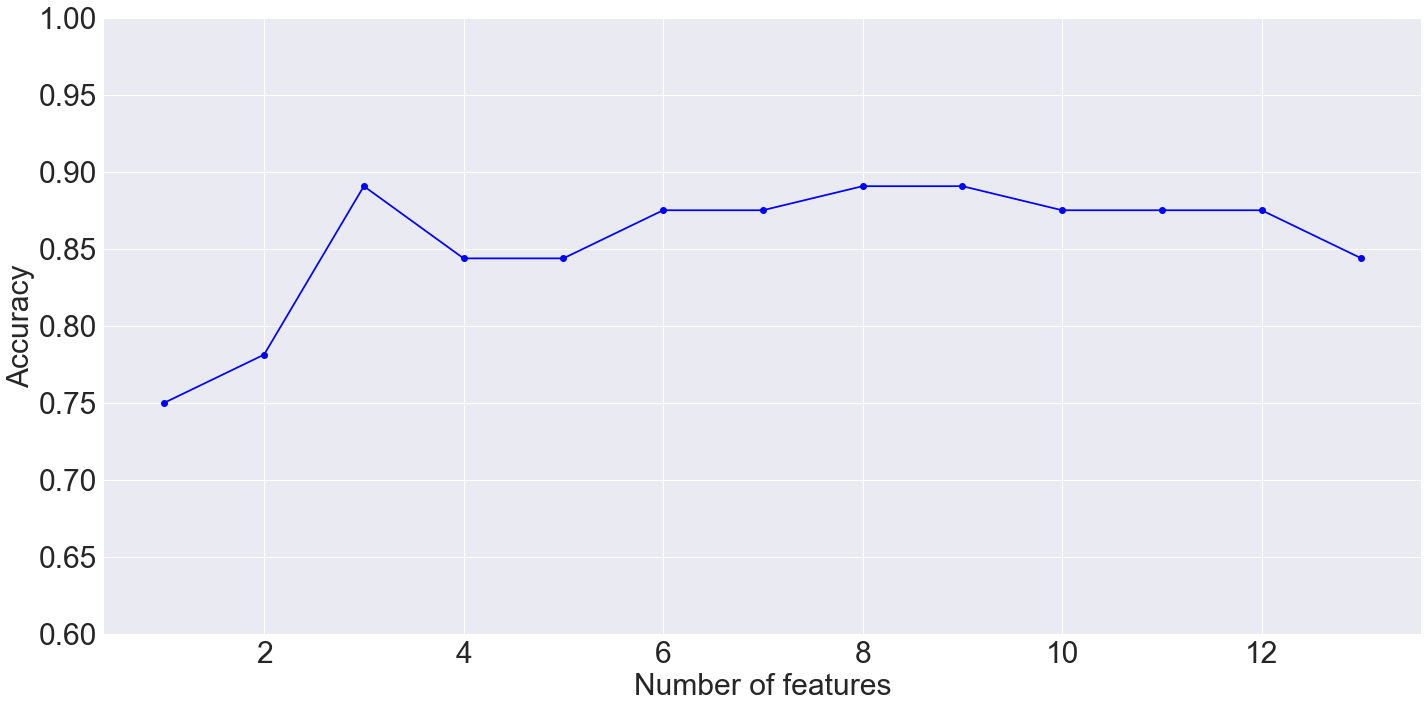

In [43]:
# source: https://notebooks.azure.com/holgerkunz/libraries/UCLMHLBFOUR/html/MLHB_week4_data_preprocessing_with_solution.ipynb

# X normalised 
knn = KNeighborsClassifier(n_neighbors=3)

# selecting features (from X training set)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_norm, y_train)


# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_,color='b', marker='o')
plt.ylim([0.6, 1.0])
plt.ylabel('Accuracy', fontsize=30)
plt.xlabel('Number of features', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.show()

In [44]:
sbs.subsets_

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12),
 (0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 12),
 (0, 1, 2, 3, 4, 6, 8, 10, 11, 12),
 (0, 1, 2, 4, 6, 8, 10, 11, 12),
 (0, 1, 2, 6, 8, 10, 11, 12),
 (0, 1, 2, 6, 10, 11, 12),
 (0, 1, 2, 10, 11, 12),
 (0, 1, 2, 11, 12),
 (0, 2, 11, 12),
 (0, 2, 12),
 (2, 12),
 (12,)]

In [45]:
k3_norm=list(sbs.subsets_[10])
print(k3_norm)

feature_labels = df.columns
print(feature_labels[k3_norm])

[0, 2, 12]
Index(['age', 'cp', 'thal'], dtype='object')


In [46]:
k8_norm=list(sbs.subsets_[5])
print(k8_norm)

feature_labels = df.columns
print(feature_labels[k8_norm])

[0, 1, 2, 6, 8, 10, 11, 12]
Index(['age', 'sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal'], dtype='object')


- Once our features have been normalised the accuracy for our neighbors classifier is at the highest value (similar to the accuracy of our model once our features had been standardised) when using 3 features.

**Selecting features**
- as part of achieveing the highest accuracy with as minimum number of features as possible, it was decided to use our selected features once features had been standardised. 
- although the normalised model has three features with an accuracy close to 0.9 it would be more appropriate as part of accounting for as much of the variance of the data to account for 8 features over 3. Besides within the normalised model 8 features equates to the same accuracy as 3 features.
- thus when using these features as part of our pipleline, a standard scaler will utilised 

In [47]:
#standardised selected features
X_selected = X[feature_labels[k8_std]]
X_selected.head()

,sex,cp,trestbps,chol,exang,slope,ca,thal
0,1,0,145.0,233.0,0,2,0,1
1,1,3,160.0,286.0,1,1,3,0
2,1,3,120.0,229.0,1,1,2,2
3,1,2,130.0,250.0,0,2,0,0
4,0,1,130.0,204.0,0,0,0,0


In [48]:
#normalised selected features
X_selected_norm = X[feature_labels[k3_norm]]
X_selected_norm.head()

,age,cp,thal
0,63.0,0,1
1,67.0,3,0
2,67.0,3,2
3,37.0,2,0
4,41.0,1,0


### Feature extraction
- further to selecting certain useful features. The process of demsionality reduction using priniciple component analysis (PCA) will help to create a new feature subspace

In [49]:
pca = PCA()

X_train_pca = pca.fit_transform(X_train)
sorted(pca.explained_variance_ratio_)

[2.9377730239839846e-05,
 3.659471567710892e-05,
 4.2643438185158546e-05,
 5.9953306633076982e-05,
 0.00015354598519405963,
 0.00016350597796531036,
 0.00022399262521293118,
 0.0002476013512827207,
 0.00042881470762542475,
 0.015701990621634691,
 0.079399580393118313,
 0.14978713188331658,
 0.75372526726391476]

- Without standardising, normalising and having applied our PCA - the first 4 features accounts for over 98% of the variance in the dataset (age, sex, cp, trestbps)

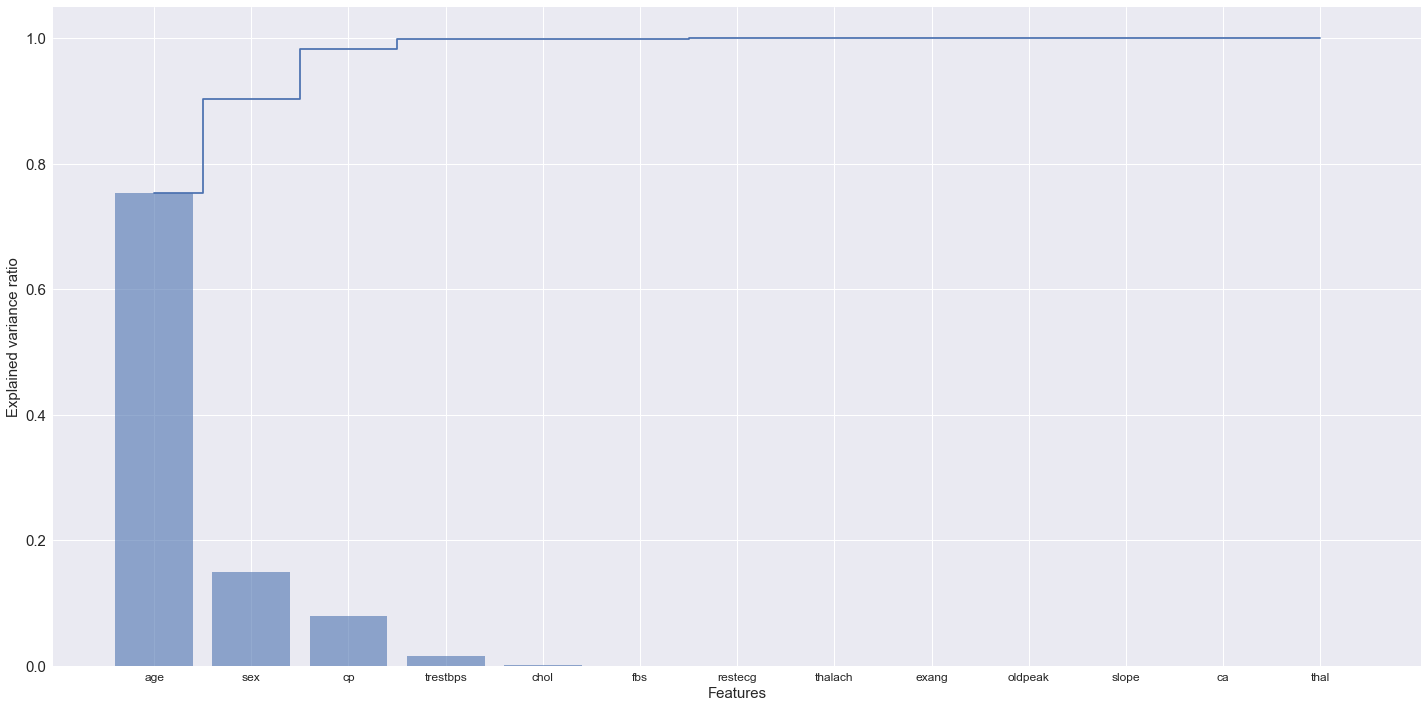

In [50]:
# adapted from: https://notebooks.azure.com/holgerkunz/libraries/UCLMHLBFOUR/html/MLHB_week4_dimension_reduction_with_solution.ipynb

explained_variance_ratio_ = pca.explained_variance_ratio_

plt.bar(np.arange(13), explained_variance_ratio_, alpha=0.6, align='center')
plt.step(np.arange(13), np.cumsum(explained_variance_ratio_), where='mid')
plt.rcParams['figure.figsize']= (10,10)

index = np.arange(len(pca.explained_variance_ratio_))
plt.xticks(index, df.columns[:-1],fontsize=12)
plt.yticks(fontsize=15)
plt.ylabel('Explained variance ratio', fontsize=15)
plt.xlabel('Features', fontsize=15)

plt.tight_layout()
plt.show()

In [51]:
pca = PCA()

#X is standardised
X_train_pca_std = pca.fit_transform(X_train_std)
sorted(pca.explained_variance_ratio_)

[0.02711299483683962,
 0.029460635812485179,
 0.036124258658498755,
 0.038596451153229711,
 0.049469077401813971,
 0.06026520149959734,
 0.064156831678953169,
 0.071512049019968757,
 0.081599708577405228,
 0.089820807970029531,
 0.093968991278359643,
 0.11444811293789227,
 0.24346487917492668]

- Once standardised and having applied our PCA - the first 4 features are no longer dominating in explaining the variance. 
- Each features becomes more equally able to contribute to the variance of the data

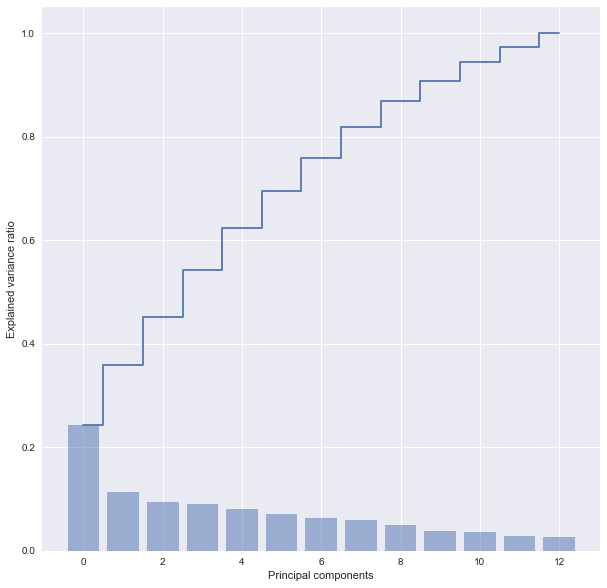

In [52]:
# adapted from: https://notebooks.azure.com/holgerkunz/libraries/UCLMHLBFOUR/html/MLHB_week4_dimension_reduction_with_solution.ipynb
explained_variance_ratio_ = pca.explained_variance_ratio_

plt.bar(np.arange(13), explained_variance_ratio_, alpha=0.5, align='center')
plt.step(np.arange(13), np.cumsum(explained_variance_ratio_), where='mid')
plt.rcParams['figure.figsize']=(10,10)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

**Accuracy with increasing number of principle components**

In [53]:
# adapted from: https://notebooks.azure.com/holgerkunz/libraries/UCLMHLBFOUR/html/MLHB_week4_dimension_reduction_with_solution.ipynb
def plotvector(X_train, y_train, X_test, y_test):
    results = []
    
    for i in range(1, 14):
        pipe_bayes = Pipeline([('std', StandardScaler()),
            ('pca', PCA(n_components=i)),
            ('clf', GaussianNB())])
        
        pipe_bayes.fit(X_train, y_train)
        accuracy = pipe_bayes.score(X_test, y_test)
        results.append([i,accuracy])
 
    results = np.array(results)
    return(results)

PCA_accuracy =  plotvector(X_train, y_train, X_test, y_test)
PCA_accuracy

array([[  1.        ,   0.81318681],
       [  2.        ,   0.8021978 ],
       [  3.        ,   0.83516484],
       [  4.        ,   0.79120879],
       [  5.        ,   0.79120879],
       [  6.        ,   0.8021978 ],
       [  7.        ,   0.79120879],
       [  8.        ,   0.79120879],
       [  9.        ,   0.8021978 ],
       [ 10.        ,   0.79120879],
       [ 11.        ,   0.8021978 ],
       [ 12.        ,   0.79120879],
       [ 13.        ,   0.78021978]])

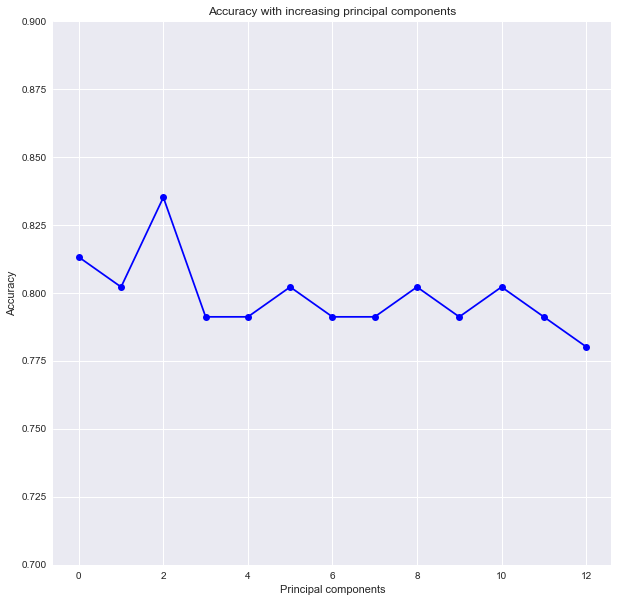

In [54]:
line = plt.plot(PCA_accuracy, color='b', marker='o')
plt.ylim(0.7, 0.9)
plt.title("Accuracy with increasing principal components")
plt.ylabel('Accuracy')
plt.xlabel('Principal components')
plt.show()

- from our above analysis the best accruracy is achieved at 2 principle components
- taking into account the effect of variance ratio as we add principle components it seems feasible therefore to suggest our model is trained using so has not to minimise accuracy but also to account for as much variance for our data without potentially leading to overfitting

** Feature selection and extraction conclusion**

as part of our pipeline:
- our features will be standardised 
- our selected 8 features for modelling are: age, sex, cp, trestbps and thalach
- and our model will make use of no more than 2 principle components

## 4. Supervised Learning

**Selecting an appropriate classifiers:**
- using the full set of 13 features with 2 principle components: 

- testing with models untuned
- testing with normalisation + PCA
- testing with standardisation + PCA

In [55]:
pipelines = []
num_components = 2
num_folds = 10
num_instances = len(X_train)
seed = 7 
scoring = 'accuracy'

**Classifer comparison**: - no standardisation, normalisation or PCA

In [56]:
pipelines_un = []

pipelines_un.append(( 'KNN' , KNeighborsClassifier()))
pipelines_un.append(( 'SVM' , SVC(probability=True, verbose=False)))
pipelines_un.append(( 'NB' , GaussianNB()))
pipelines_un.append(( 'DT' , DecisionTreeClassifier()))
pipelines_un.append(('Dummy', DummyClassifier(strategy="most_frequent")))
pipelines_un.append(('MLP', MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, alpha=1e-4,
                    activation='logistic', tol=1e-4, random_state=1, verbose=False)))

In [57]:
results_un = []
names_un = []

for name, model in pipelines_un:
  kfold = KFold(n=num_instances, n_folds=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold,
      scoring=scoring)
  results_un.append(cv_results)
  names_un.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

KNN: 0.612987 (0.108695)
SVM: 0.524242 (0.069384)
NB: 0.830519 (0.058961)
DT: 0.745671 (0.098561)
Dummy: 0.528788 (0.066080)


/Users/ivan/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/ivan/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/ivan/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLP: 0.816234 (0.038189)


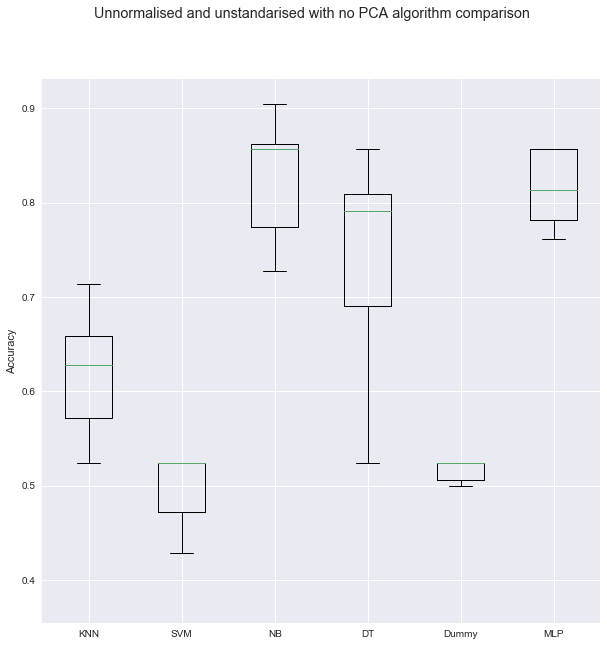

In [58]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Unnormalised and unstandarised with no PCA algorithm comparison' )
ax = fig.add_subplot(111)
plt.rcParams['figure.figsize']=(12,8)
plt.boxplot(results_un)
plt.ylabel('Accuracy')
ax.set_xticklabels(names_un)
plt.show()

**Classifer comparison**: - Normalisation + 2 principle components

In [59]:
pipelines_n = []

pipe_knn = Pipeline([('mms', MinMaxScaler()),
                    ('pca', PCA(n_components=num_components)),
                    ('clf', KNeighborsClassifier())])

pipe_svc = Pipeline([('mms', MinMaxScaler()),
                     ('pca', PCA(n_components=num_components)),
                     ('clf', SVC(probability=True, verbose=False))])

pipe_NB = Pipeline([('mms', MinMaxScaler()),
                     ('pca', PCA(n_components=num_components)),
                     ('clf', GaussianNB())])

pipe_DT = Pipeline([('mms', MinMaxScaler()),
                    ('pca', PCA(n_components=num_components)),
                    ('clf', DecisionTreeClassifier())])

pipe_Dummy = Pipeline([('mms', MinMaxScaler()),
                    ('clf', DummyClassifier(strategy="most_frequent"))])

pipe_MLP = Pipeline([('mms', MinMaxScaler()),
                    ('pca', PCA(n_components=num_components)),
                     ('clf', MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=750, alpha=1e-4,
                    activation='logistic', tol=1e-4, random_state=1, verbose=False))])



pipelines_n.append(( 'NormalKNN' , pipe_knn))
pipelines_n.append(( 'NormalSVM' , pipe_svc))
pipelines_n.append(( 'NormalNB' , pipe_NB))
pipelines_n.append(( 'NormalDT' , pipe_DT))
pipelines_n.append(( 'NormalDummy', pipe_Dummy))
pipelines_n.append(( 'NormalMLP', pipe_MLP))

In [60]:
results_n = []
names_n = []
for name, model in pipelines_n:
  kfold = KFold(n=num_instances, n_folds=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold,
      scoring=scoring)
  results_n.append(cv_results)
  names_n.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

NormalKNN: 0.774675 (0.099550)
NormalSVM: 0.806710 (0.053442)
NormalNB: 0.806710 (0.053442)
NormalDT: 0.769481 (0.045437)
NormalDummy: 0.528788 (0.066080)
NormalMLP: 0.528788 (0.066080)


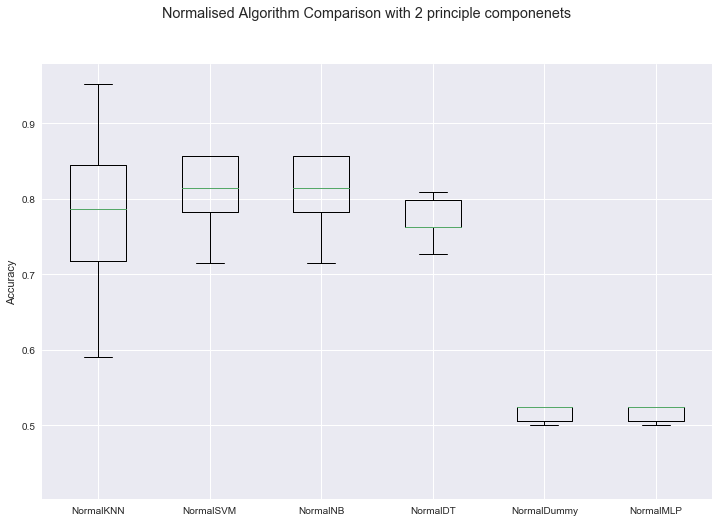

In [61]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle( 'Normalised Algorithm Comparison with 2 principle componenets' )
ax = fig.add_subplot(111)
plt.boxplot(results_n)
plt.ylabel('Accuracy')
ax.set_xticklabels(names_n)
plt.show()

**Classifer comparison**: - Standardisation + 2 principle components

In [62]:
pipelines_s = []

pipe_knn = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=num_components)),
                    ('clf', KNeighborsClassifier())])

pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=num_components)),
                     ('clf', SVC(probability=True, verbose=False))])

pipe_NB = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=num_components)),
                     ('clf', GaussianNB())])

pipe_DT = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=num_components)),
                    ('clf', DecisionTreeClassifier())])

pipe_Dummy = Pipeline([('scl', StandardScaler()),
                    ('clf', DummyClassifier(strategy="most_frequent"))])

pipe_MLP = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=num_components)),
                     ('clf', MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=750, alpha=1e-4,
                    activation='logistic', tol=1e-4, random_state=1, verbose=False))])



pipelines_s.append(( 'StandardKNN' , pipe_knn))
pipelines_s.append(( 'StandardSVM' , pipe_svc))
pipelines_s.append(( 'StandardNB' , pipe_NB))
pipelines_s.append(( 'StandardDT' , pipe_DT))
pipelines_s.append(( 'StandardDummy', pipe_Dummy))
pipelines_s.append(( 'StandardMLP', pipe_MLP))

In [63]:
results_s = []
names_s = []
for name, model in pipelines_s:
  kfold = KFold(n=num_instances, n_folds=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold,
      scoring=scoring)
  results_s.append(cv_results)
  names_s.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

StandardKNN: 0.844805 (0.081289)
StandardSVM: 0.835498 (0.066016)
StandardNB: 0.835714 (0.077078)
StandardDT: 0.792424 (0.100273)
StandardDummy: 0.528788 (0.066080)


/Users/ivan/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/ivan/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/ivan/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/ivan/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/ivan/anaconda/lib/python3

StandardMLP: 0.868182 (0.054608)


/Users/ivan/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


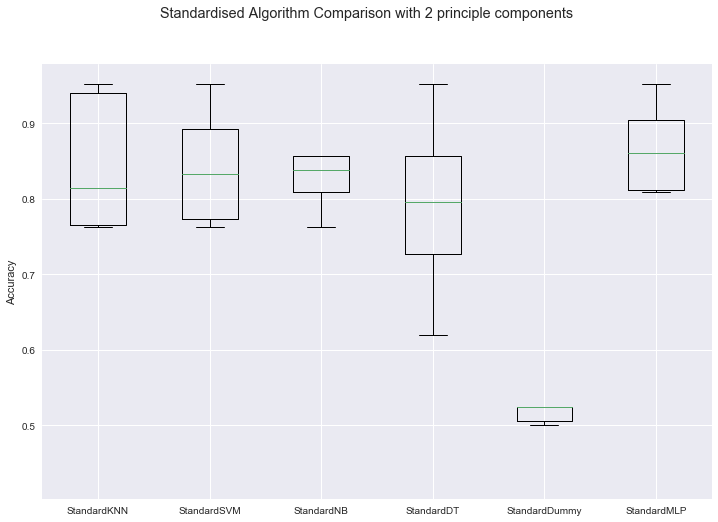

In [64]:
fig = plt.figure()
fig.suptitle('Standardised Algorithm Comparison with 2 principle components')
ax = fig.add_subplot(111)
plt.boxplot(results_s)
ax.set_xticklabels(names_s)
plt.ylabel('Accuracy')
plt.show()

**Conclusion**

Selected KNN and SVM for further tuning and evaluation

- both classifiers consistently performed well with features standardised or normalised
- when features were standardised the accuracy was highest for these classifers were highest
- next section of analysis is to optimise and compare these two classifers using our training dataset with a decided 2 principle componetent parameter 

## 5. Parameter and hyper-parameter tuning

** Nearest neighbours hyper-parameter tuning + 2 principle components :**

In [65]:
pipe_knn = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=2)),
                     ('clf', KNeighborsClassifier())])
            
#Fit Pipeline to training Data
pipe_knn.fit(X_train, y_train) 

num_folds = 10
scores = cross_val_score(estimator=pipe_knn, 
                         X=X_train, 
                         y=y_train, 
                         cv=num_folds,
                         n_jobs=1)
print('--> Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

#Tune Hyperparameters
param_range = range(3, 21, 2) # only odd numbers for kNN
param_grid = [{'clf__n_neighbors': param_range}]

# instantiate the grid
grid = GridSearchCV(estimator=pipe_knn, 
                    param_grid=param_grid, 
                    cv=num_folds, 
                    scoring='accuracy')

gs_knn = grid.fit(X_train, y_train)
print('--> Tuned Parameters Best Score: ',gs_knn.best_score_)
print('--> Best Parameters: \n',gs_knn.best_params_)

--> Model Training Accuracy: 0.845 +/- 0.089
--> Tuned Parameters Best Score:  0.853773584906
--> Best Parameters: 
 {'clf__n_neighbors': 11}


**Nearest neighbours hyper-parameter tuning + 4 principle components:**

In [66]:
pipe_knn = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=4)),
                     ('clf', KNeighborsClassifier())])
            
#Fit Pipeline to training Data
pipe_knn.fit(X_train, y_train) 

num_folds = 10
scores = cross_val_score(estimator=pipe_knn, 
                         X=X_train, 
                         y=y_train, 
                         cv=num_folds,
                         n_jobs=1)
print('--> Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

#Tune Hyperparameters
param_range = range(3, 21, 2) # only odd numbers for kNN
param_grid = [{'clf__n_neighbors': param_range}]

# instantiate the grid
grid = GridSearchCV(estimator=pipe_knn, 
                    param_grid=param_grid, 
                    cv=num_folds, 
                    scoring='accuracy')

gs_knn = grid.fit(X_train, y_train)
print('--> Tuned Parameters Best Score: ',gs_knn.best_score_)
print('--> Best Parameters: \n',gs_knn.best_params_)

--> Model Training Accuracy: 0.821 +/- 0.077
--> Tuned Parameters Best Score:  0.844339622642
--> Best Parameters: 
 {'clf__n_neighbors': 9}


**SVM hyper-parameter tuning + 2 principle components:**

In [67]:
pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=2)),
                     ('clf', SVC(probability=True, verbose=False))])

#Fit Pipeline to training Data
pipe_svc.fit(X_train, y_train)

scores = cross_val_score(estimator=pipe_svc, X=X_train, y=y_train, cv=num_folds, n_jobs=1, verbose=0)
print('--> Model Training Accuracy (Standard Scaler): %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

#Tune Hyperparameters
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range,'clf__kernel': ['linear']},
              {'clf__C': param_range,'clf__gamma': param_range,
               'clf__kernel': ['rbf']}]

gs_svc = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=kfold,
                  n_jobs=1)
gs_svc = gs_svc.fit(X_train, y_train)
print('--> Tuned Parameters Best Score: ',gs_svc.best_score_)
print('--> Best Parameters: \n',gs_svc.best_params_)

--> Model Training Accuracy (Standard Scaler): 0.835 +/- 0.069
--> Tuned Parameters Best Score:  0.86320754717
--> Best Parameters: 
 {'clf__C': 1.0, 'clf__kernel': 'linear'}


**SVM hyper-parameter tuning + 4 principle components:**

In [68]:
pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=4)),
                     ('clf', SVC(probability=True, verbose=False))])

#Fit Pipeline to training Data
pipe_svc.fit(X_train, y_train)

scores = cross_val_score(estimator=pipe_svc, X=X_train, y=y_train, cv=num_folds, n_jobs=1, verbose=0)
print('--> Model Training Accuracy (Standard Scaler): %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

#Tune Hyperparameters
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range,'clf__kernel': ['linear']},
              {'clf__C': param_range,'clf__gamma': param_range,
               'clf__kernel': ['rbf']}]

gs_svc = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=kfold,
                  n_jobs=1)
gs_svc = gs_svc.fit(X_train, y_train)
print('--> Tuned Parameters Best Score: ',gs_svc.best_score_)
print('--> Best Parameters: \n',gs_svc.best_params_)

--> Model Training Accuracy (Standard Scaler): 0.854 +/- 0.063
--> Tuned Parameters Best Score:  0.853773584906
--> Best Parameters: 
 {'clf__C': 1.0, 'clf__kernel': 'linear'}


**kNN using selected 8 features + 2 principle components:**

In [69]:
#selected features 
X_train_selected, X_test_selected = X_train[feature_labels[k8_std]], X_test[feature_labels[k8_std]]

In [70]:
pipe_knn = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=2)), #different number of features
                     ('clf', KNeighborsClassifier())])
            
#Fit Pipeline to training Data
pipe_knn.fit(X_train_selected, y_train) 

num_folds = 10
scores = cross_val_score(estimator=pipe_knn, 
                         X=X_train_selected, 
                         y=y_train, 
                         cv=num_folds,
                         n_jobs=1)
print('--> Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

#Tune Hyperparameters
param_range = range(3, 21, 2) # only odd numbers for kNN
param_grid = [{'clf__n_neighbors': param_range}]

# instantiate the grid
grid = GridSearchCV(estimator=pipe_knn, 
                    param_grid=param_grid, 
                    cv=num_folds, 
                    scoring='accuracy')

#best kNN predictor model
gs_knn_1 = grid.fit(X_train_selected, y_train)
print('--> Tuned Parameters Best Score: ',gs_knn_1.best_score_)
print('--> Best Parameters: \n',gs_knn_1.best_params_)

--> Model Training Accuracy: 0.835 +/- 0.061
--> Tuned Parameters Best Score:  0.853773584906
--> Best Parameters: 
 {'clf__n_neighbors': 17}


**kNN using selected 8 features + 4 principle components:**

In [71]:
pipe_knn = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=4)), #different number of features
                     ('clf', KNeighborsClassifier())])
            
#Fit Pipeline to training data
pipe_knn.fit(X_train_selected, y_train) 

num_folds = 10
scores = cross_val_score(estimator=pipe_knn, 
                         X=X_train_selected, 
                         y=y_train, 
                         cv=num_folds,
                         n_jobs=1)
print('--> Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

#Tune hyperparameters
param_range = range(3, 21, 2) # only odd numbers for kNN
param_grid = [{'clf__n_neighbors': param_range}]

# instantiate the grid
grid = GridSearchCV(estimator=pipe_knn, 
                    param_grid=param_grid, 
                    cv=num_folds, 
                    scoring='accuracy')

gs_knn = grid.fit(X_train_selected, y_train)
print('--> Tuned Parameters Best Score: ',gs_knn.best_score_)
print('--> Best Parameters: \n',gs_knn.best_params_)

--> Model Training Accuracy: 0.830 +/- 0.080
--> Tuned Parameters Best Score:  0.844339622642
--> Best Parameters: 
 {'clf__n_neighbors': 9}


**SVM hyper-parameter tuning using selected features + 4 principle components:**

In [72]:
pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=4)),
                     ('clf', SVC(probability=True, verbose=False))])

#Fit Pipeline to training Data
pipe_svc.fit(X_train_selected, y_train)

scores = cross_val_score(estimator=pipe_svc, X=X_train_selected, y=y_train, cv=num_folds, n_jobs=1, verbose=0)
print('--> Model Training Accuracy (Standard Scaler): %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

#Tune hyperparameters
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range,'clf__kernel': ['linear']},
              {'clf__C': param_range,'clf__gamma': param_range,
               'clf__kernel': ['rbf']}]

gs_svc = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=kfold,
                  n_jobs=1)
gs_svc = gs_svc.fit(X_train_selected, y_train)
print('--> Tuned Parameters Best Score: ',gs_svc.best_score_)
print('--> Best Parameters: \n',gs_svc.best_params_)



--> Model Training Accuracy (Standard Scaler): 0.840 +/- 0.057
--> Tuned Parameters Best Score:  0.844339622642
--> Best Parameters: 
 {'clf__C': 0.01, 'clf__kernel': 'linear'}


**SVC hyper-parameter tuning using selected features + 2 principle components:**

In [73]:
pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=2)),
                     ('clf', SVC(probability=True, verbose=False))])

#Fit Pipeline to training data
pipe_svc.fit(X_train_selected, y_train)

scores = cross_val_score(estimator=pipe_svc, X=X_train_selected, y=y_train, cv=num_folds, n_jobs=1, verbose=0)
print('--> Model Training Accuracy (Standard Scaler): %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

#Tune Hyperparameters
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range,'clf__kernel': ['linear']},
              {'clf__C': param_range,'clf__gamma': param_range,
               'clf__kernel': ['rbf']}]

gs_svc_1 = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=kfold,
                  n_jobs=1)

#best SVM predictor model
gs_svc_1 = gs_svc_1.fit(X_train_selected, y_train)
print('--> Tuned Parameters Best Score: ',gs_svc_1.best_score_)
print('--> Best Parameters: \n',gs_svc_1.best_params_)



--> Model Training Accuracy (Standard Scaler): 0.854 +/- 0.060
--> Tuned Parameters Best Score:  0.86320754717
--> Best Parameters: 
 {'clf__C': 10.0, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}


**Conclusion from paramter and hyperparameter tuning**

- both models performed very similarly 
- For BOTH all features and selected features - kNN performed worse wth increasing PCA
- For all the features - SVM performed better with increasing the number of principle components to 4
- For selected features - SVM performed best out of all models with a decrease in number of principle components to 2

## 6. Evaluation

- using best parameters from our grid search hyperparameter tuning the below learning curves are generated to understand the way in which our models learn. Also including: 
- cross validation 
- Confusion matrix
- ROC Curve and AUC score

### Learning curves

**K-nearest neighbours learning curve:**

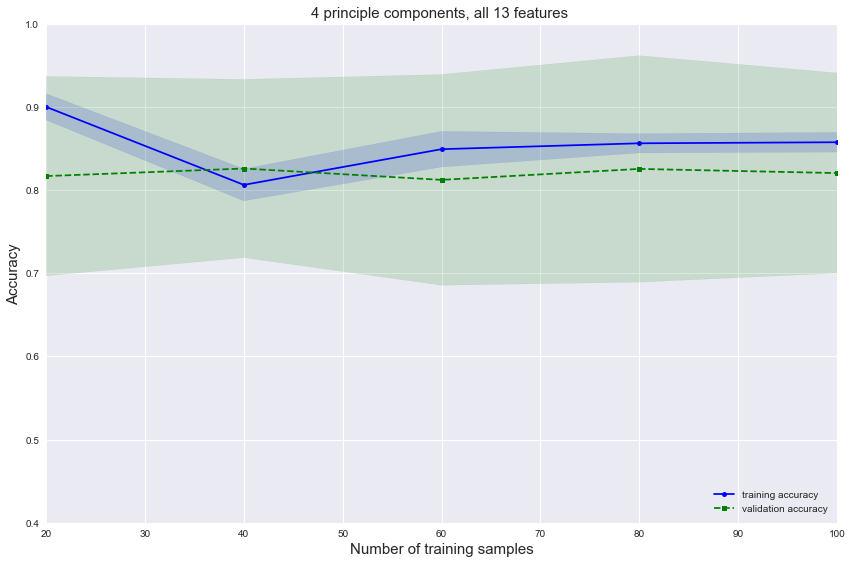

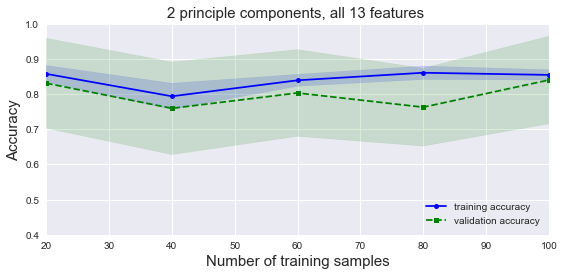

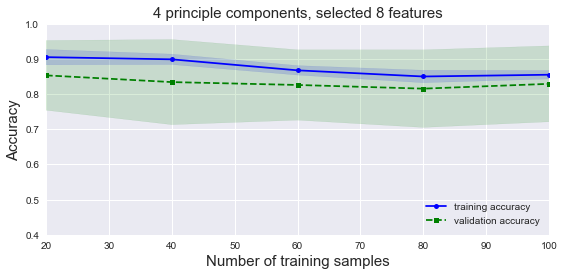

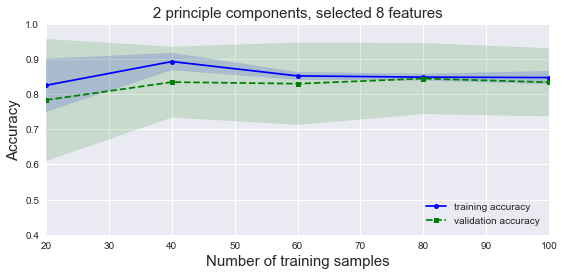

In [74]:
# adapted from https://notebooks.azure.com/holgerkunz/libraries/UCLMLHBDAYSIX/html/MLHB_week6_part2_evaluation%20and%20hyperparameter%20tuning_with_solution_final.ipynb
#all X using best accuracy parameters above

pipe_knn = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=4)),
                     ('clf', KNeighborsClassifier(n_neighbors = 9))])

pipe_knn2 = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=2)),
                     ('clf', KNeighborsClassifier(n_neighbors = 11))])


#X selected using best accuracy parameters above

pipe_knn3 = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=4)),
                     ('clf', KNeighborsClassifier(n_neighbors = 9))])


pipe_knn4 = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=2)),
                     ('clf', KNeighborsClassifier(n_neighbors = 17))])


def print_learning_curve(pipe, X_train, y_train, title):

    train_sizes, train_scores, test_scores =\
                    learning_curve(
                        estimator=pipe, 
                        X=X_train, 
                        y=y_train, 
                        train_sizes=np.linspace(0.1, 1.0, 10), 
                        cv=20,
                        n_jobs=1)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, 
             color='blue', marker='o', 
             markersize=5, label='training accuracy')

    plt.fill_between(train_sizes, 
                     train_mean + train_std,
                     train_mean - train_std, 
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, 
             color='green', linestyle='--', 
             marker='s', markersize=5, 
             label='validation accuracy')

    plt.fill_between(train_sizes, 
                     test_mean + test_std,
                     test_mean - test_std, 
                     alpha=0.15, color='green')

    plt.grid(grid)
    plt.xlabel('Number of training samples', fontsize='15')
    plt.ylabel('Accuracy', fontsize='15')
    plt.legend(loc='lower right')
    plt.ylim([0.4, 1.0])
    plt.xlim([20, 100])
    plt.rcParams['figure.figsize']=(8,4)
    plt.title(title, fontsize='15')
    plt.tight_layout()
    plt.show()

print_learning_curve(pipe_knn, X_train, y_train, '4 principle components, all 13 features ')
print_learning_curve(pipe_knn2, X_train, y_train, '2 principle components, all 13 features ')

print_learning_curve(pipe_knn3, X_train_selected, y_train, '4 principle components, selected 8 features')
print_learning_curve(pipe_knn4, X_train_selected, y_train, '2 principle components, selected 8 features')

** SVM learning curves:**

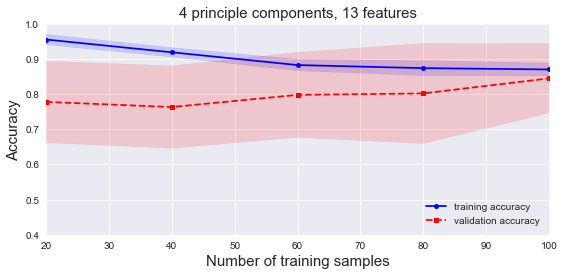

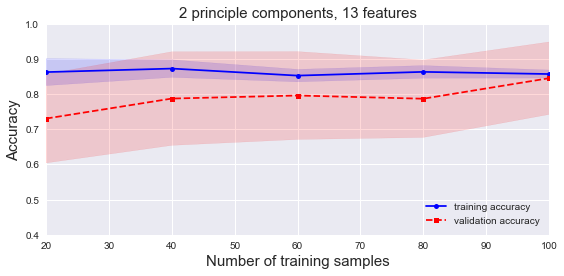

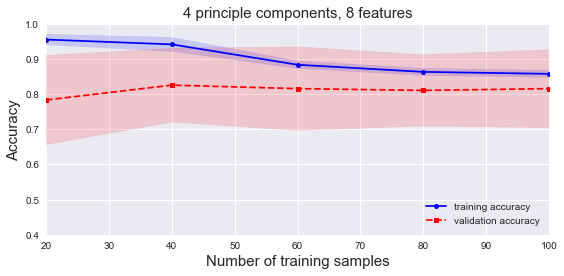

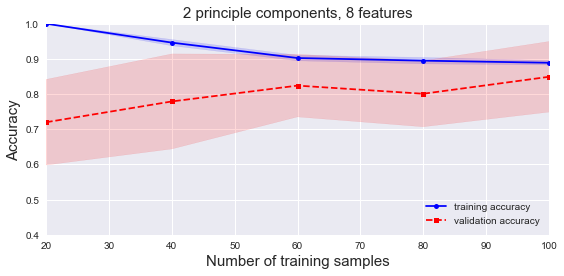

In [75]:
# adapted from https://notebooks.azure.com/holgerkunz/libraries/UCLMLHBDAYSIX/html/MLHB_week6_part2_evaluation%20and%20hyperparameter%20tuning_with_solution_final.ipynb
#all X features

pipe_svc = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=4)),
            ('clf', SVC(probability=True, verbose=False, kernel='rbf', C=10.0, gamma=0.01))])


pipe_svc1 = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=2)),
            ('clf', SVC(probability=True, verbose=False, kernel='rbf', C=1000.0, gamma=0.001))])


#selected X features

pipe_svc2 = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=4)),
            ('clf', SVC(probability=True, verbose=False, kernel='rbf', C=1000.0, gamma=0.001))])

pipe_svc3 = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=2)),
            ('clf', SVC(probability=True, verbose=False, kernel='rbf', C=1000.0, gamma=0.1))])



def print_learning_curve(pipe, X_data, y_data, title):

    train_sizes, train_scores, test_scores =\
                    learning_curve(
                        estimator=pipe, 
                        X=X_data, 
                        y=y_data, 
                        train_sizes=np.linspace(0.1, 1.0, 10), 
                        cv=20,
                        n_jobs=1)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, 
             color='blue', marker='o', 
             markersize=5, label='training accuracy')

    plt.fill_between(train_sizes, 
                     train_mean + train_std,
                     train_mean - train_std, 
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, 
             color='red', linestyle='--', 
             marker='s', markersize=5, 
             label='validation accuracy')

    plt.fill_between(train_sizes, 
                     test_mean + test_std,
                     test_mean - test_std, 
                     alpha=0.15, color='red')

    plt.grid(grid)
    plt.xlabel('Number of training samples', fontsize='15')
    plt.ylabel('Accuracy', fontsize='15')
    plt.legend(loc='lower right')
    plt.ylim([0.4, 1.0])
    plt.xlim([20, 100])
    plt.rcParams['figure.figsize']=(8,4)
    plt.title(title, fontsize='15')
    plt.tight_layout()
    plt.show()

    
print_learning_curve(pipe_svc, X_train, y_train, '4 principle components, 13 features')
print_learning_curve(pipe_svc1, X_train, y_train, '2 principle components, 13 features')

    
print_learning_curve(pipe_svc2, X_train_selected, y_train, '4 principle components, 8 features')
print_learning_curve(pipe_svc3, X_train_selected, y_train, '2 principle components, 8 features')



**SVM + selected features with 4 principle components**

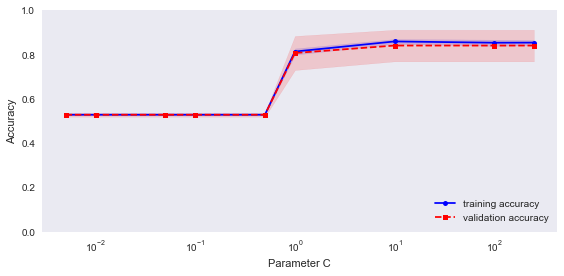

In [76]:
# adapted from https://notebooks.azure.com/holgerkunz/libraries/UCLMLHBDAYSIX/html/MLHB_week6_part2_evaluation%20and%20hyperparameter%20tuning_with_solution_final.ipynb
pipe_svc_VC = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=4)),
                    ('clf', SVC(probability=True, verbose=False, kernel='rbf', C=1000.0, gamma=0.001))])

param_range = [0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0, 100.0, 250.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_svc_VC, 
                X=X_train_selected, 
                y=y_train, 
                param_name='clf__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='red', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='red')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.0])
plt.tight_layout()
plt.show()

**SVM + selected features with 2 principle components**

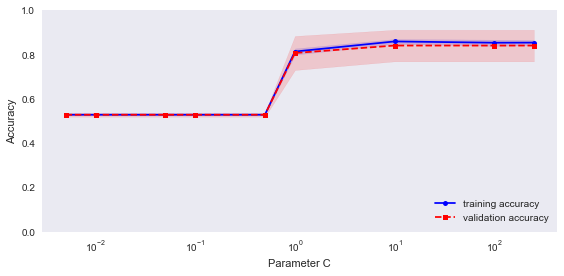

In [77]:
# adapted from https://notebooks.azure.com/holgerkunz/libraries/UCLMLHBDAYSIX/html/MLHB_week6_part2_evaluation%20and%20hyperparameter%20tuning_with_solution_final.ipynb
pipe_svc_VC2 = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', SVC(probability=True, verbose=False, kernel='rbf', C=1000.0, gamma=0.1))])

param_range = [0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0, 100.0, 250.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_svc_VC, 
                X=X_train_selected, 
                y=y_train, 
                param_name='clf__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='red', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='red')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.0])
plt.tight_layout()
plt.show()

- Under selected features the SVC performs the best according to learning curves compared to the knn and overal performs better with a 2 rather than 4 principle components

**Assessing performace using 10 K-fold Cross_Validation**

In [78]:
pipe_svc_VC2 = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=2)),
            ('clf', SVC(probability=True, verbose=False, kernel='rbf', C=1000.0, gamma=0.1))])


kfold = StratifiedKFold(y=y_train, 
                        n_folds=10,
                        random_state=1)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_svc.fit(X_train, y_train)
    score = pipe_svc.score(X_test, y_test)
    scores.append(score)

print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))



CV accuracy: 0.802 +/- 0.000


**Assessing Imbalance**

In [79]:
#show imbalance
print ("instances:", y.size)
print ("class label 0:", y[y==0].size)
print ("class label 1:", y[y==1].size)

instances: 303
class label 0: 164
class label 1: 139


- Doesn't seem to be any significant imbalance that needs correcting

### Finalizing model

**Fitting the best parameters and testing accuracy**

In [80]:
# Using best parameters 
clf_svc = gs_svc_1.best_estimator_

clf_svc.fit(X_train, y_train)
scores = cross_val_score(estimator=clf_svc,
                         X=X_train,
                         y=y_train,
                         cv=num_folds,
                         n_jobs=1)
print('--> Final SVM Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('--> Final SVM Accuracy on Test set: %.5f' % clf_svc.score(X_test,y_test))

--> Final SVM Model Training Accuracy: 0.845 +/- 0.050
--> Final SVM Accuracy on Test set: 0.81319


In [81]:
# Using best parameters 
clf_knn = gs_knn_1.best_estimator_

clf_knn.fit(X_train, y_train)
scores = cross_val_score(estimator=clf_knn,
                         X=X_train,
                         y=y_train,
                         cv=num_folds,
                         n_jobs=1)
print('--> Final kNN Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('--> Final kNN Accuracy on Test set: %.5f' % clf_knn.score(X_test,y_test))

--> Final kNN Model Training Accuracy: 0.854 +/- 0.060
--> Final kNN Accuracy on Test set: 0.80220


- the SVM model using selected featues and 2 principle components to train is the best model between the two

**Confusion matrix for optimized SVM**

EVALUATING FINAL SVM MODEL
Accuracy: 0.813186813187
Confusion Matrix:


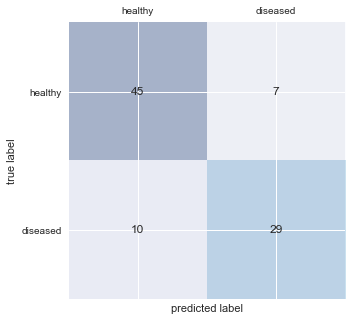

             precision    recall  f1-score   support

          0       0.82      0.87      0.84        52
          1       0.81      0.74      0.77        39

avg / total       0.81      0.81      0.81        91

ROC_AUC score 0.804487179487


In [82]:
y_pred_SVC = clf_svc.predict(X_test)

print('EVALUATING FINAL SVM MODEL')
print('Accuracy:', accuracy_score(y_test, y_pred_SVC))
print('Confusion Matrix:')
confmat = confusion_matrix(y_test, y_pred_SVC)

classes=["healthy", "diseased"]
tick_marks = np.arange(len(classes))
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.xticks(tick_marks, classes, fontsize=10)
plt.yticks(tick_marks, classes, fontsize=10)
plt.tight_layout()
plt.show()

print(classification_report(y_test, y_pred_SVC))
print('ROC_AUC score', roc_auc_score(y_test, y_pred_SVC))

**Confusion matrix for optimized kNN**

EVALUATING FINAL kNN MODEL
Accuracy: 0.802197802198
Confusion Matrix:


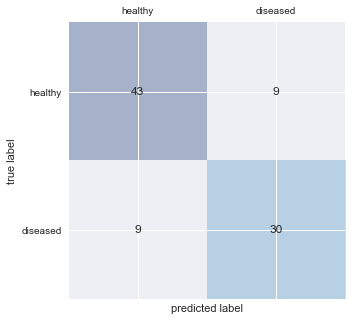

             precision    recall  f1-score   support

          0       0.83      0.83      0.83        52
          1       0.77      0.77      0.77        39

avg / total       0.80      0.80      0.80        91

ROC_AUC score 0.798076923077


In [83]:
y_pred_knn = clf_knn.predict(X_test)

print('EVALUATING FINAL kNN MODEL')
print('Accuracy:', accuracy_score(y_test, y_pred_knn))
confmat = confusion_matrix(y_test, y_pred_knn)
print('Confusion Matrix:')

classes=["healthy", "diseased"]
tick_marks = np.arange(len(classes))
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.xticks(tick_marks, classes, fontsize=10)
plt.yticks(tick_marks, classes, fontsize=10)
plt.tight_layout()
plt.show()

print(classification_report(y_test, y_pred_knn))
print('ROC_AUC score', roc_auc_score(y_test, y_pred_knn))

**ROC curve for optimised kNN and SVM**

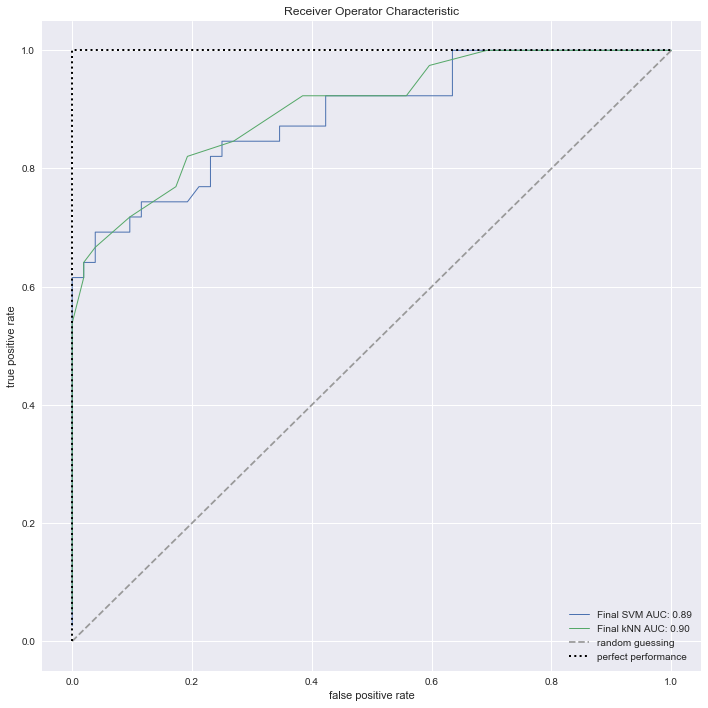

In [84]:
# adapted from: https://notebooks.azure.com/holgerkunz/libraries/MLHBWEEKEIGHT/html/MLHB_week_8_comparison_between_different_classifiers.ipynb
fig = plt.figure(figsize=(10, 10))
all_tpr = []

pipelines = [('Final SVM', clf_svc), ('Final kNN', clf_knn)]
             
for name, model in pipelines:
      
    model.fit(X_train, y_train)
    
    probas = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    current_auc = str('%.2f' %roc_auc)
    
    plt.plot(fpr, 
             tpr, 
             lw=1, 
             label= str(name + ' AUC: ' + current_auc))

plt.plot([0, 1], 
         [0, 1], 
         linestyle='--', 
         color=(0.6, 0.6, 0.6), 
         label='random guessing')

plt.plot([0, 0, 1], 
         [0, 1, 1], 
         lw=2, 
         linestyle=':', 
         color='black', 
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

**AUC ROC Score for SVC**

In [85]:
clf_svc = clf_svc.fit(X_train, y_train)
y_pred = clf_svc.predict(X_test)

In [86]:
from sklearn.metrics import roc_auc_score, accuracy_score
print('ROC_AUC SVC: %.5f' % roc_auc_score(y_true=y_test, y_score=y_pred))

ROC_AUC SVC: 0.80449


In [87]:
probas = clf_svc.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
print ('AUC SVC:', '%.2f' %roc_auc)

AUC SVC: 0.89


**ROC AUC Score for kNN**

In [88]:
clf_knn = clf_knn.fit(X_train, y_train)
y_pred = clf_knn.predict(X_test)

In [89]:
print('ROC_AUC kNN: %.5f' % roc_auc_score(y_true=y_test, y_score=y_pred))

ROC_AUC kNN: 0.79808


In [90]:
probas = clf_knn.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
print ('AUC kNN:', '%.2f' %roc_auc)

AUC kNN: 0.90


**Using tPOT**

- how close is our model to that generated by tPOT

In [91]:
!pip install tpot

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [92]:
pipeline_optimizer = TPOTClassifier(generations=3, population_size=10, cv=5,
                                    random_state=42, verbosity=2)

In [93]:
pipeline_optimizer.fit(X_train, y_train)

Optimization Progress:  50%|█████     | 20/40 [00:07<00:09,  2.07pipeline/s]

Generation 1 - Current best internal CV score: 0.8353266888150609


Optimization Progress:  75%|███████▌  | 30/40 [00:12<00:05,  1.92pipeline/s]

Generation 2 - Current best internal CV score: 0.8353266888150609


Generation 3 - Current best internal CV score: 0.8399778516057588

Best pipeline: LogisticRegression(RFE(input_matrix, criterion=entropy, max_features=0.5, n_estimators=100, step=0.4), C=10.0, dual=False, penalty=l2)


TPOTClassifier(config_dict={'sklearn.naive_bayes.GaussianNB': {}, 'sklearn.naive_bayes.BernoulliNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.naive_bayes.MultinomialNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.tree.DecisionT....45,
        0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,
        0.95,  1.  ])}}}},
        crossover_rate=0.1, cv=5, disable_update_check=False,
        early_stop=None, generations=3, max_eval_time_mins=5,
        max_time_mins=None, memory=None, mutation_rate=0.9, n_jobs=1,
        offspring_size=10, periodic_checkpoint_folder=None,
        population_size=10, random_state=42, scoring=None, subsample=1.0,
        verbosity=2, warm_start=False)

EVALUATING FINAL Logistic Regression
Accuracy: 0.791208791209
Confusion Matrix:


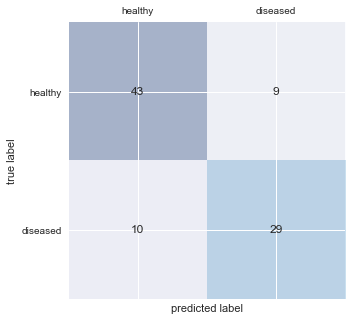

             precision    recall  f1-score   support

          0       0.81      0.83      0.82        52
          1       0.76      0.74      0.75        39

avg / total       0.79      0.79      0.79        91

ROC_AUC score 0.785256410256


In [94]:
clf = LogisticRegression(C=10.0, dual=False, penalty='l2').fit(X_train, y_train)
clf.score(X_test, y_test)  

y_pred_clf = clf.predict(X_test)

print('EVALUATING FINAL Logistic Regression')
print('Accuracy:', accuracy_score(y_test, y_pred_clf))
confmat = confusion_matrix(y_test, y_pred_clf)
print('Confusion Matrix:')

classes=["healthy", "diseased"]
tick_marks = np.arange(len(classes))
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.xticks(tick_marks, classes, fontsize=10)
plt.yticks(tick_marks, classes, fontsize=10)
plt.tight_layout()
plt.show()

print(classification_report(y_test, y_pred_clf))
print('ROC_AUC score', roc_auc_score(y_test, y_pred_clf))

In [95]:
probas = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1], pos_label=1)
auc = auc(fpr, tpr)
print ('Logistic regression Classifier AUC:', '%.2f' %auc)

Logistic regression Classifier AUC: 0.89
